<a href="https://colab.research.google.com/github/dibyanshi01/Ty-Btech-PBL/blob/main/Forest_Fire_new_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##New

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [ ]:
df=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv')

##Data Description

In [ ]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [ ]:
df.isnull().any()

X        False
Y        False
month    False
day      False
FFMC     False
DMC      False
DC       False
ISI      False
temp     False
RH       False
wind     False
rain     False
area     False
dtype: bool

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


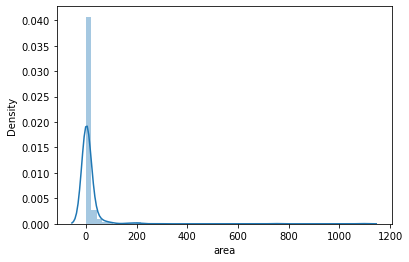

In [ ]:
sns.distplot(df['area'])

In [ ]:
df.day.unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

In [ ]:
df['day'].value_counts()

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

##Visualising Dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'Counts'),
 Text(0.5, 0, 'Days'),
 Text(0.5, 1.0, 'Countplot for the days in the week')]

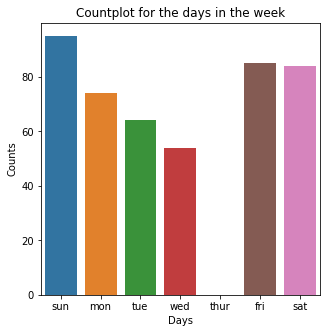

In [ ]:
plt.rcParams['figure.figsize']=[5,5]
day=sns.countplot(df['day'],order=['sun','mon','tue','wed','thur','fri','sat'])
day.set(title='Countplot for the days in the week',xlabel='Days',ylabel='Counts')


In [ ]:
df['month'].value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
dec      9
apr      9
jan      2
may      2
nov      1
Name: month, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'Counts'),
 Text(0.5, 0, 'Months'),
 Text(0.5, 1.0, 'Countplot for the months in a year')]

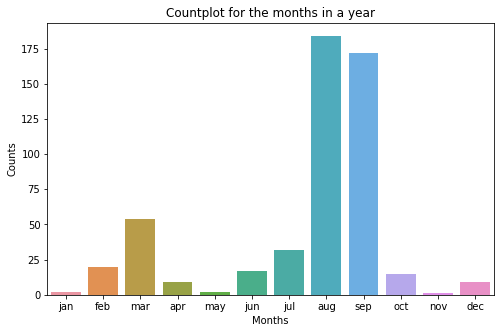

In [ ]:
plt.rcParams['figure.figsize']=[8,5]
day=sns.countplot(df['month'],order=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])
day.set(title='Countplot for the months in a year',xlabel='Months',ylabel='Counts')

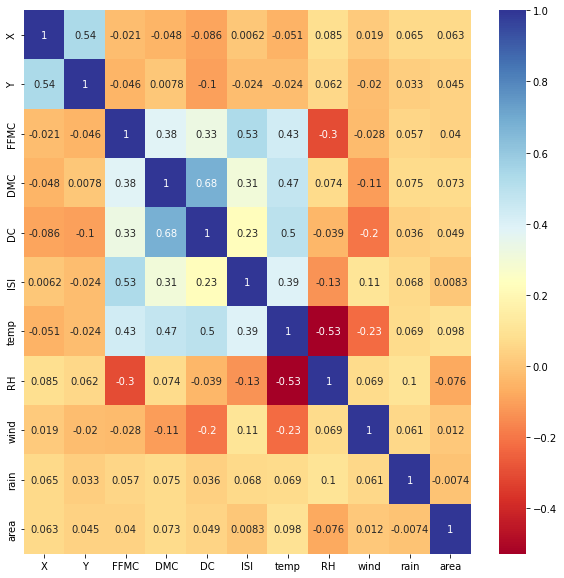

In [ ]:
corr=df.corr()
plt.figure(figsize=(10,10))

sns.heatmap(data=corr,cmap='RdYlBu', annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'Area'),
 Text(0.5, 0, 'Temperature'),
 Text(0.5, 1.0, 'Area vs Temperature')]

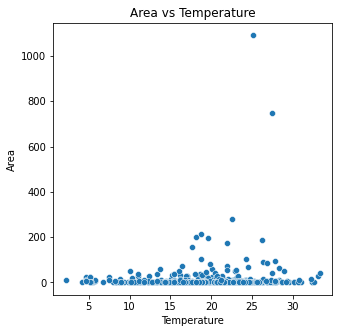

In [ ]:
plt.rcParams['figure.figsize']=[5,5]
scat=sns.scatterplot(df['temp'],df['area'])
scat.set(title='Area vs Temperature',xlabel='Temperature',ylabel='Area')

##Reforming the Datset

In [ ]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
df.month=df.month.map({'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12})
df.day=df.day.map({'mon':1,'tue':2,'wed':3,'thu':4,'fri':5,'sat':6,'sun':7})

df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    int64  
 3   day     517 non-null    int64  
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 52.6 KB


###Label Encoder

In [ ]:

# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['month']= label_encoder.fit_transform(df['month'])
 
df['month'].unique()

array([ 2,  9,  7,  8,  3,  5,  6,  1,  0, 11,  4, 10])

In [ ]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['day']= label_encoder.fit_transform(df['day'])
 
df['day'].unique()

array([4, 1, 5, 6, 0, 2, 3])

##Train-Test Split

In [ ]:
y=df['area']
x=df.drop(columns='area')

In [ ]:
x

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,2,4,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,9,1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,9,5,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,2,4,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,2,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,7,6,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0
513,2,4,7,6,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0
514,7,4,7,6,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0
515,1,4,7,5,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0


In [ ]:
y

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
       ...  
512     6.44
513    54.29
514    11.16
515     0.00
516     0.00
Name: area, Length: 517, dtype: float64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)
x_test

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
463,6,5,1,1,75.1,4.4,16.2,1.9,4.6,82,6.3,0.0
418,2,4,7,6,92.0,203.2,664.5,8.1,24.9,42,5.4,0.0
391,8,6,8,4,91.1,91.3,738.1,7.2,20.7,46,2.7,0.0
370,7,4,8,6,91.0,276.3,825.1,7.1,13.8,77,7.6,0.0
166,6,5,7,2,92.1,111.2,654.1,9.6,16.6,47,0.9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
25,7,4,7,6,91.4,142.4,601.4,10.6,16.3,60,5.4,0.0
102,2,4,7,1,94.8,108.3,647.1,17.0,20.1,40,4.0,0.0
270,2,2,7,1,92.1,152.6,658.2,14.3,21.8,56,3.1,0.0
443,1,2,6,4,90.7,80.9,368.3,16.8,14.8,78,8.0,0.0


#Models

###Linear regression

In [ ]:
lr=LinearRegression()
model=lr.fit(x_train, y_train)
lr_predictions=model.predict(x_test)
print(lr_predictions)


In [ ]:
print(abs(lr.score(x_test,y_test)))

0.44189233290036056


In [ ]:
print('MSE = ',mse(lr_predictions, y_test))
print('MAE = ',mae(lr_predictions, y_test))
print('R2 score = ',r2_score(lr_predictions, y_test))

MSE =  771.964327491239
MAE =  17.8963079929711
R2 score =  -3.1987376666919474


###Predicting Value

In [ ]:
ans=lr.predict([[7,4,8,6,93.5,139.4,594.2,20.3,5.1,96,9,0]])       #Area of burned forest
print(ans)

[-0.78208423]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
c=lr.predict(x_test)
print("RMSE for Decision Tree:",np.sqrt(np.mean((y_test-c)**2)))

RMSE for Decision Tree: 27.784246030641874


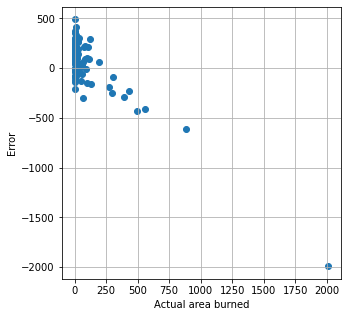

In [ ]:
plt.xlabel("Actual area burned")
plt.ylabel("Error")
plt.grid(True)
plt.scatter(10*(y_test),10*(c)-10*(y_test))

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  2.,  0.,  0.,  2.,  3.,  2.,  4.,  6.,
         8., 11.,  9., 15., 12., 12.,  8.,  4.,  2.,  1.,  1.]),
 array([-1992.98834954, -1943.32603065, -1893.66371176, -1844.00139288,
        -1794.33907399, -1744.6767551 , -1695.01443621, -1645.35211732,
        -1595.68979843, -1546.02747954, -1496.36516065, -1446.70284176,
        -1397.04052287, -1347.37820399, -1297.7158851 , -1248.05356621,
        -1198.39124732, -1148.72892843, -1099.06660954, -1049.40429065,
         -999.74197176,  -950.07965287,  -900.41733398,  -850.7550151 ,
         -801.09269621,  -751.43037732,  -701.76805843,  -652.10573954,
         -602.44342065,  -552.78110176,  -503.11878287,  -453.45646398,
         -403.79414509,  -354.13182621,  -304.46950732,  -254.80718843,
         -205.14486954,  -155.48255065,  -105.82023176,   -56.157912

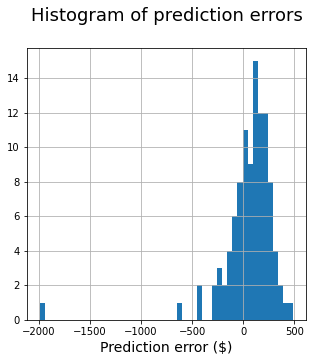

In [ ]:
plt.title("Histogram of prediction errors\n",fontsize=18)
plt.xlabel("Prediction error ($)",fontsize=14)
plt.grid(True)
plt.hist(10*(c.reshape(c.size,))-10*(y_test),bins=50)

In [ ]:
def rec(m,n,tol):
    if type(m)!='numpy.ndarray':
        m=np.array(m)
    if type(n)!='numpy.ndarray':
        n=np.array(n)
    l=m.size
    percent = 0
    for i in range(l):
        if np.abs(10**m[i]-10**n[i])<=tol:
            percent+=1
    return 100*(percent/l)

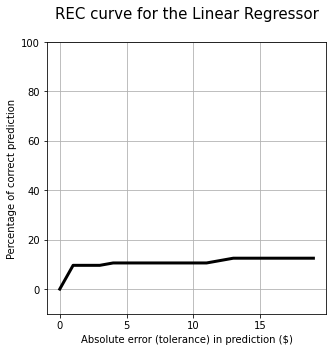

In [ ]:
tol_max=20
rec_lr=[]
for i in range(tol_max):
    rec_lr.append(rec(c,y_test,i))

plt.figure(figsize=(5,5))
plt.title("REC curve for the Linear Regressor\n",fontsize=15)
plt.xlabel("Absolute error (tolerance) in prediction ($)")
plt.ylabel("Percentage of correct prediction")
plt.xticks([i for i in range(0,tol_max+1,5)])
plt.ylim(-10,100)
plt.yticks([i*20 for i in range(6)])
plt.grid(True)
plt.plot(range(tol_max),rec_lr,'k-',lw=3)

###Random Forest Regressor

In [ ]:
rfreg=RandomForestRegressor(max_depth=10, random_state=15, n_estimators=100)
model=rfreg.fit(x_train,y_train)
rf_predictions=model.predict(x_test)
print(rf_predictions)

[  9.70104048  51.81542293   5.3605714    7.09726228   1.64359276
   3.51898101  17.59308961   8.14256261   6.08401789  22.17589846
   7.06798233   7.95320774  43.68838555   1.64042319   7.83014522
   6.74578941  23.56690438  53.81648171  11.24044418  32.99114271
   3.70486943   1.34871371   4.98357734   9.10114758 283.71257535
   4.65060995   6.38485861  10.54570322  43.68838555  26.36910236
   2.14654075  12.8018157    2.88730428   5.54315153   6.71546153
  30.27005954   1.8688565    3.91438994   3.12666342   5.05066406
   4.39722086   4.74336716  16.72955916   6.18116069   5.1117725
  17.82045518  13.65469093  25.12404456  11.55465653  19.23697523
   3.70202449   6.83809944  16.88329577   6.56537294   2.88019347
  17.55327542   2.41422453   4.19774767  20.76295762   3.44038485
   5.64956339   7.31545876  26.68956723   5.22510483  12.26916509
   3.83962104   9.25366421  13.42596866  29.75418381  18.58799547
  22.36451298   8.23069526  62.45920882   4.39556166  19.63833662
   5.063145

In [ ]:
print('MSE = ',mse(rf_predictions, y_test))
print('MAE = ',mae(rf_predictions, y_test))
print('R2 score = ',abs(r2_score(rf_predictions, y_test)))

MSE =  1469.77748713438
MAE =  17.533896675334056
R2 score =  0.7467652169187111


###Predict Value

In [ ]:
ans=rfreg.predict([[7,4,8,6,93.5,139.4,594.2,20.3,5.1,96,9,0]])       #Area of burned forest
print(ans)

[33.00604839]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
a=rfreg.predict(x_test)
rmse_rf=np.sqrt(np.mean((y_test-a)**2))
print("RMSE for Random Forest:",rmse_rf)

RMSE for Random Forest: 38.337677122308534


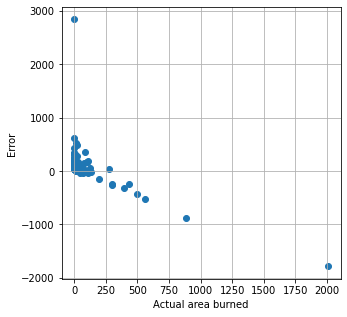

In [ ]:
plt.xlabel("Actual area burned")
plt.ylabel("Error")
plt.grid(True)
plt.scatter(10*(y_test),10*(a)-10*(y_test))

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         1.,  1.,  1.,  3.,  1.,  2., 44., 29.,  8.,  6.,  1.,  3.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-1785.75487023, -1693.29725775, -1600.83964528, -1508.3820328 ,
        -1415.92442033, -1323.46680785, -1231.00919538, -1138.5515829 ,
        -1046.09397043,  -953.63635795,  -861.17874548,  -768.721133  ,
         -676.26352053,  -583.80590805,  -491.34829558,  -398.8906831 ,
         -306.43307063,  -213.97545815,  -121.51784568,   -29.0602332 ,
           63.39737927,   155.85499175,   248.31260422,   340.7702167 ,
          433.22782917,   525.68544165,   618.14305412,   710.6006666 ,
          803.05827907,   895.51589155,   987.97350402,  1080.4311165 ,
         1172.88872897,  1265.34634145,  1357.80395392,  1450.2615664 ,
         1542.71917887,  1635.17679135,  1727.63440382,  1820.092016

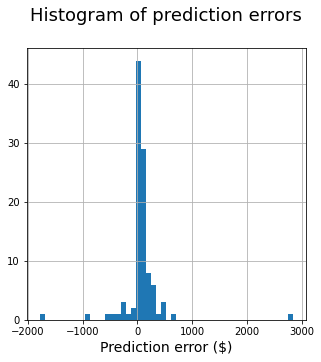

In [ ]:
plt.title("Histogram of prediction errors\n",fontsize=18)
plt.xlabel("Prediction error ($)",fontsize=14)
plt.grid(True)
plt.hist(10*(a.reshape(a.size,))-10*(y_test),bins=50)

In [ ]:
def rec(m,n,tol):
    if type(m)!='numpy.ndarray':
        m=np.array(m)
    if type(n)!='numpy.ndarray':
        n=np.array(n)
    l=m.size
    percent = 0
    for i in range(l):
        if np.abs(10**m[i]-10**n[i])<=tol:
            percent+=1
    return 100*(percent/l)

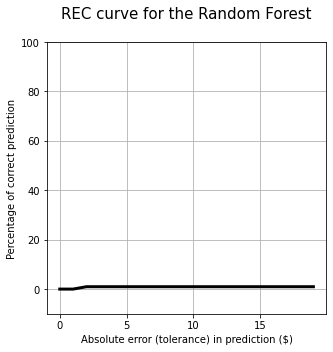

In [ ]:
tol_max=20
rec_RF=[]
for i in range(tol_max):
    rec_RF.append(rec(a,y_test,i))

plt.figure(figsize=(5,5))
plt.title("REC curve for the Random Forest\n",fontsize=15)
plt.xlabel("Absolute error (tolerance) in prediction ($)")
plt.ylabel("Percentage of correct prediction")
plt.xticks([i for i in range(0,tol_max+1,5)])
plt.ylim(-10,100)
plt.yticks([i*20 for i in range(6)])
plt.grid(True)
plt.plot(range(tol_max),rec_RF,'k-',lw=3)

###Decision Tree Regression

In [ ]:
dt=DecisionTreeRegressor(max_depth=13, random_state=15)
model=dt.fit(x_train,y_train)
dt_predictions=model.predict(x_test)
print(dt_predictions)

[1.27166667e+00 0.00000000e+00 2.69000000e+00 0.00000000e+00
 0.00000000e+00 1.64000000e+00 2.84000000e+00 0.00000000e+00
 1.12200000e+01 2.17000000e-01 7.29000000e+00 2.45900000e+01
 8.64500000e+01 2.00300000e+01 0.00000000e+00 0.00000000e+00
 3.03200000e+01 7.03200000e+01 3.20000000e+00 2.17000000e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.83000000e+01
 1.05660000e+02 4.46300000e+00 3.06333333e+00 1.27166667e+00
 8.64500000e+01 1.27166667e+00 3.72000000e+00 1.08200000e+01
 2.12222222e+00 0.00000000e+00 3.06333333e+00 3.68500000e+01
 0.00000000e+00 7.80000000e+00 3.58800000e+01 0.00000000e+00
 3.30000000e+00 5.83000000e+00 3.46153846e-02 1.10000000e-01
 3.46153846e-02 6.11300000e+01 3.78000000e+00 1.12400000e+01
 0.00000000e+00 0.00000000e+00 2.12222222e+00 1.12400000e+01
 0.00000000e+00 4.46300000e+00 3.46153846e-02 0.00000000e+00
 0.00000000e+00 6.50000000e-01 0.00000000e+00 3.46153846e-02
 0.00000000e+00 1.21000000e+01 8.00000000e+00 3.46153846e-02
 4.46300000e+00 6.500000

In [ ]:
print(abs(dt.score(x_test,y_test)))

0.8117599653258261


In [ ]:
print('MSE = ',mse(dt_predictions, y_test))
print('MAE = ',mae(dt_predictions, y_test))
print('R2 score = ',abs(r2_score(dt_predictions, y_test)))

MSE =  969.9850892437963
MAE =  14.453345126561475
R2 score =  1.5309480779750348


##Predicting Values

In [ ]:
ans=dt.predict([[7,4,8,6,93.5,139.4,594.2,20.3,5.1,96,9,0]])       #Area of burned forest
print(ans)

[26.]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
b=dt.predict(x_test)
print("RMSE for Decision Tree:",np.sqrt(np.mean((y_test-b)**2)))

RMSE for Decision Tree: 31.1445836261106


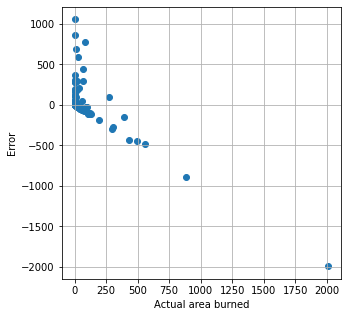

In [ ]:
plt.xlabel("Actual area burned")
plt.ylabel("Error")
plt.grid(True)
plt.scatter(10*(y_test),10*(b)-10*(y_test))

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,
         0.,  1.,  1.,  1.,  4.,  8., 47., 14.,  5.,  4.,  1.,  6.,  1.,
         0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  1.]),
 array([-1993.8  , -1932.792, -1871.784, -1810.776, -1749.768, -1688.76 ,
        -1627.752, -1566.744, -1505.736, -1444.728, -1383.72 , -1322.712,
        -1261.704, -1200.696, -1139.688, -1078.68 , -1017.672,  -956.664,
         -895.656,  -834.648,  -773.64 ,  -712.632,  -651.624,  -590.616,
         -529.608,  -468.6  ,  -407.592,  -346.584,  -285.576,  -224.568,
         -163.56 ,  -102.552,   -41.544,    19.464,    80.472,   141.48 ,
          202.488,   263.496,   324.504,   385.512,   446.52 ,   507.528,
          568.536,   629.544,   690.552,   751.56 ,   812.568,   873.576,
          934.584,   995.592,  1056.6  ]),
 <a list of 50 Patch objects>)

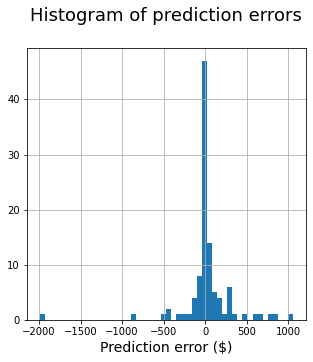

In [ ]:
plt.title("Histogram of prediction errors\n",fontsize=18)
plt.xlabel("Prediction error ($)",fontsize=14)
plt.grid(True)
plt.hist(10*(b.reshape(b.size,))-10*(y_test),bins=50)

In [ ]:
def rec(m,n,tol):
    if type(m)!='numpy.ndarray':
        m=np.array(m)
    if type(n)!='numpy.ndarray':
        n=np.array(n)
    l=m.size
    percent = 0
    for i in range(l):
        if np.abs(10**m[i]-10**n[i])<=tol:
            percent+=1
    return 100*(percent/l)

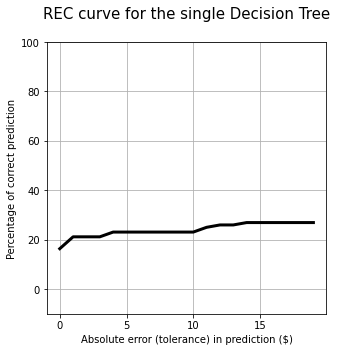

In [ ]:
tol_max=20
rec_DT=[]
for i in range(tol_max):
    rec_DT.append(rec(b,y_test,i))

plt.figure(figsize=(5,5))
plt.title("REC curve for the single Decision Tree\n",fontsize=15)
plt.xlabel("Absolute error (tolerance) in prediction ($)")
plt.ylabel("Percentage of correct prediction")
plt.xticks([i for i in range(0,tol_max+1,5)])
plt.ylim(-10,100)
plt.yticks([i*20 for i in range(6)])
plt.grid(True)
plt.plot(range(tol_max),rec_DT,'k-',lw=3)

##XG Boost

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor

In [ ]:
# define model
model = XGBRegressor()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = abs(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )


Mean MAE: 22.812 (11.157)


In [ ]:
xg=XGBRegressor()
xg.fit(x_train, y_train)

xg_predict = xg.predict(x_test)
print(xg_predict)

[05:01:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[ 5.0049520e+00  2.0764154e+01  5.4553785e+00  5.2828455e+00
  6.0915405e-01  4.2140980e+00  2.0625088e+01  6.9289055e+00
  2.4918360e+01  1.5026685e+01  6.9864783e+00  7.0197034e+00
  3.3115131e+01  4.5124063e+00  3.5595686e+00  1.2226120e+01
  7.4852481e+00  3.9851868e+01  1.4451556e+01  2.3795847e+01
  2.0973840e+00  1.1593495e+01  4.1181574e+00  3.7939689e+00
  7.5041656e+02  1.0584761e+01  3.2459831e+00  6.3131256e+00
  3.3115131e+01  1.0552233e+01  3.0862944e+00  8.8704971e+01
  5.5828490e+00  1.8345083e+01  5.9849133e+00  1.0010400e+01
  1.4816970e-02  4.4922962e+00  2.2362404e+00  7.0701923e+00
  5.6998711e+00  1.1225039e+01  3.1901114e+00  5.4262218e+00
  8.0902481e+00  1.1634528e+01  2.0620401e+01  1.5619095e+01
  9.6871090e+00  2.3738911e+01  8.5622966e-03  3.1322060e+00
  2.7783268e+01  4.4223623e+00 -1.2398143e+00  1.2377288e+00
  3.1249087e+00  8.

In [ ]:
print(abs(xg.score(x_test,y_test)))

10.309713502193983


In [ ]:
print('MSE = ',mse(xg_predict, y_test))
print('MAE = ',mae(xg_predict, y_test))
print('R2 score = ',abs(r2_score(xg_predict, y_test)))

MSE =  6055.0258702589845
MAE =  21.003627687119522
R2 score =  0.12802937030724237


In [ ]:
d=xg.predict(x_test)
print("RMSE for XG Boost:",np.sqrt(np.mean((y_test-d)**2)))

RMSE for XG Boost: 77.81404674131133


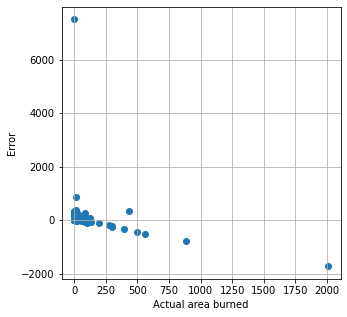

In [ ]:
plt.xlabel("Actual area burned")
plt.ylabel("Error")
plt.grid(True)
plt.scatter(10*(y_test),10*(d)-10*(y_test))

(array([ 1.,  0.,  0.,  0.,  0.,  1.,  2.,  1.,  5., 68., 19.,  5.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-1733.80982056, -1549.0503136 , -1364.29080664, -1179.53129968,
         -994.77179272,  -810.01228577,  -625.25277881,  -440.49327185,
         -255.73376489,   -70.97425793,   113.78524902,   298.54475598,
          483.30426294,   668.0637699 ,   852.82327686,  1037.58278381,
         1222.34229077,  1407.10179773,  1591.86130469,  1776.62081165,
         1961.3803186 ,  2146.13982556,  2330.89933252,  2515.65883948,
         2700.41834644,  2885.17785339,  3069.93736035,  3254.69686731,
         3439.45637427,  3624.21588123,  3808.97538818,  3993.73489514,
         4178.4944021 ,  4363.25390906,  4548.01341602,  4732.77292297,
         4917.53242993,  5102.29193689,  5287.05144385,  5471.810950

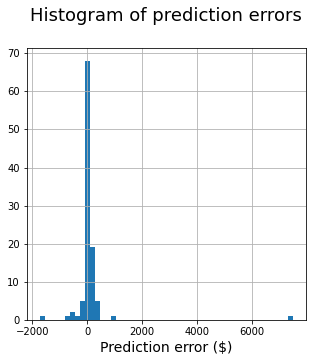

In [ ]:
plt.title("Histogram of prediction errors\n",fontsize=18)
plt.xlabel("Prediction error ($)",fontsize=14)
plt.grid(True)
plt.hist(10*(d.reshape(d.size,))-10*(y_test),bins=50)

In [ ]:
def rec(m,n,tol):
    if type(m)!='numpy.ndarray':
        m=np.array(m)
    if type(n)!='numpy.ndarray':
        n=np.array(n)
    l=m.size
    percent = 0
    for i in range(l):
        if np.abs(10**m[i]-10**n[i])<=tol:
            percent+=1
    return 100*(percent/l)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in power
  if __name__ == '__main__':


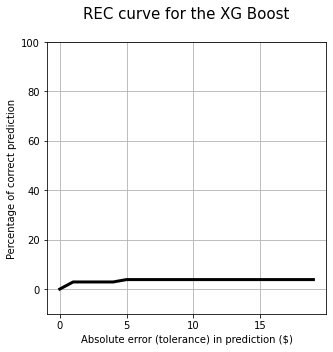

In [ ]:
tol_max=20
rec_XG=[]
for i in range(tol_max):
    rec_XG.append(rec(d,y_test,i))

plt.figure(figsize=(5,5))
plt.title("REC curve for the XG Boost\n",fontsize=15)
plt.xlabel("Absolute error (tolerance) in prediction ($)")
plt.ylabel("Percentage of correct prediction")
plt.xticks([i for i in range(0,tol_max+1,5)])
plt.ylim(-10,100)
plt.yticks([i*20 for i in range(6)])
plt.grid(True)
plt.plot(range(tol_max),rec_XG,'k-',lw=3)

##Comparison of Regressors used 📜

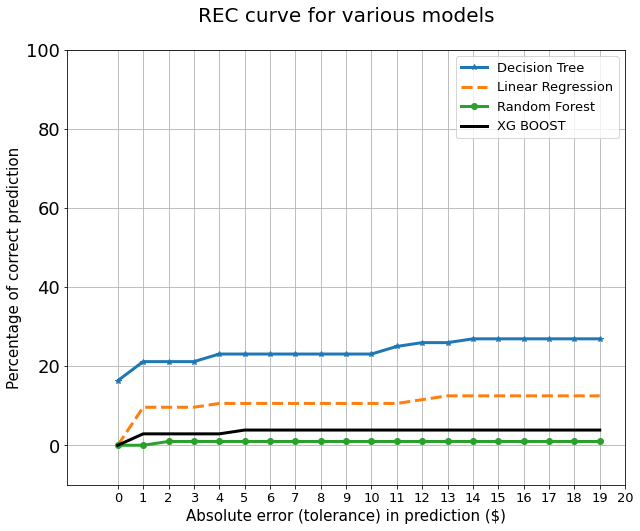

In [ ]:
plt.figure(figsize=(10,8))
plt.title("REC curve for various models\n",fontsize=20)
plt.xlabel("Absolute error (tolerance) in prediction ($)",fontsize=15)
plt.ylabel("Percentage of correct prediction",fontsize=15)
plt.xticks([i for i in range(0,tol_max+1,1)],fontsize=13)
plt.ylim(-10,100)
plt.xlim(-2,tol_max)
plt.yticks([i*20 for i in range(6)],fontsize=18)
plt.grid(True)
plt.plot(range(tol_max),rec_DT,'*-',lw=3)
plt.plot(range(tol_max),rec_lr,'--',lw=3)
plt.plot(range(tol_max),rec_RF,'o-',lw=3)
plt.plot(range(tol_max),rec_XG,'k-',lw=3)
plt.legend(['Decision Tree','Linear Regression','Random Forest','XG BOOST'],fontsize=13)

Receiver Operating Characteristic (ROC) curves provide a powerful tool for visualizing and comparing classification results. Regression Error Characteristic (REC) curves generalize ROC curves to regression. REC curves plot the error tolerance on the x-axis versus the percentage of points predicted within the tolerance on the y-axis. The resulting curve estimates the cumulative distribution function of the error. The REC curve visually presents commonly-useds statistics. The area-under-the-curve (AUC) is a biased estimate of the expected error. The R2 value can be estimated using the ratio of the AUC for a given model to the AUC for the nul-model. Users can quickly assess the relative merits of many regression functions by examining the relative position of their REC curves. The shape of the curve reveals additional information that can be used to guide modeling.

Error histograms show how the errors on the testing instances are distributed.

##Random Forest is has most accurate results and least effected by error.